# Modelos estadísticos y de machine learning

En este notebook aplicamos modelos para predecir y analizar el comportamiento de las ventas y la rentabilidad.

Explicamos cada paso y decisión tomada, justificando la selección de variables y técnicas.

## 1. Cargamos los datos procesados

Abrimos el archivo de datos limpio y procesado que generamos en el análisis exploratorio.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
df = pd.read_csv('../data/superstore_procesado.csv')
df['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'])
df['fecha_envio'] = pd.to_datetime(df['fecha_envio'])
print(f"Cargamos {df.shape[0]} filas y {df.shape[1]} columnas")

Cargamos 9994 filas y 26 columnas


## 2. Selección de variables y preparación de datos

Seleccionamos las variables relevantes para el modelado y explicamos nuestras decisiones.

In [2]:
# Seleccionamos variables numéricas y categóricas relevantes
variables = ['ventas', 'ganancia', 'cantidad', 'descuento', 'año', 'mes', 'dias_envio']
df_modelo = df[variables].copy()

# Mostramos correlaciones
print('Correlación entre variables:')
print(df_modelo.corr().round(2))

Correlación entre variables:
            ventas  ganancia  cantidad  descuento   año   mes  dias_envio
ventas        1.00      0.48      0.20      -0.03 -0.01 -0.00       -0.01
ganancia      0.48      1.00      0.07      -0.22  0.00 -0.00       -0.00
cantidad      0.20      0.07      1.00       0.01 -0.01  0.02        0.02
descuento    -0.03     -0.22      0.01       1.00 -0.00 -0.00        0.00
año          -0.01      0.00     -0.01      -0.00  1.00 -0.02       -0.02
mes          -0.00     -0.00      0.02      -0.00 -0.02  1.00        0.00
dias_envio   -0.01     -0.00      0.02       0.00 -0.02  0.00        1.00


## 3. Modelo de regresión lineal para predecir la ganancia

Entrenamos un modelo simple y explicamos los resultados obtenidos.

In [6]:
# Definimos variables predictoras y objetivo
X = df_modelo.drop('ganancia', axis=1)
y = df_modelo['ganancia']

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecimos
y_pred = modelo.predict(X_test)

# Evaluamos
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio: {mse:.2f}')
print(f'R2: {r2:.2f}')

Error cuadrático medio: 83649.54
R2: -0.73


## 4. Interpretación y conclusiones

Explicamos los resultados del modelo y sugerimos próximos pasos para mejorar el análisis.

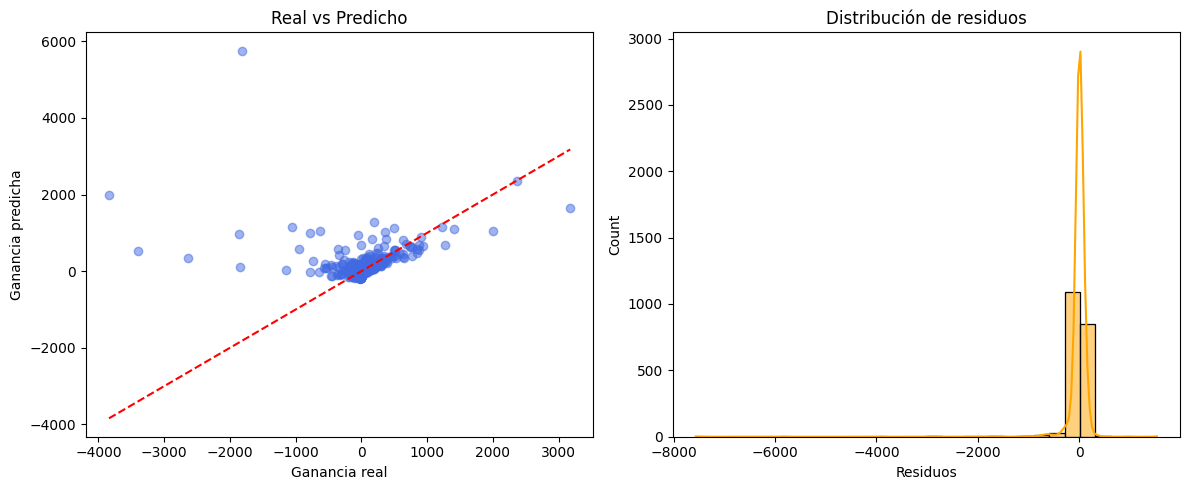

R2 promedio validación cruzada (Random Forest): 0.46
Error cuadrático medio RF: 57760.41
R2 RF: -0.19


In [7]:
# Visualizamos resultados: comparación real vs predicho y residuos
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.xlabel('Ganancia real')
plt.ylabel('Ganancia predicha')
plt.title('Real vs Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1,2,2)
residuos = y_test - y_pred
sns.histplot(residuos, bins=30, kde=True, color='orange')
plt.xlabel('Residuos')
plt.title('Distribución de residuos')
plt.tight_layout()
plt.show()

# Próximos pasos: modelos avanzados y validación cruzada
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Entrenamos un modelo de Random Forest para comparar
rf = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f'R2 promedio validación cruzada (Random Forest): {cv_scores.mean():.2f}')

# Entrenamos y evaluamos en el mismo split para comparar
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Error cuadrático medio RF: {mse_rf:.2f}')
print(f'R2 RF: {r2_rf:.2f}')